In [97]:
import pandas as pd
import matplotlib.pyplot as plt

df_electricity = pd.read_csv('electricity_data_nl_2022_2024_hourly_flow.csv', index_col=0, parse_dates=True)
df_weather = pd.read_csv('hist_weather_data_2022-2024_app_temp2025-03-19T09-46-18+00-00.csv', index_col=0, parse_dates=True)


In [98]:
df_electricity.index = pd.to_datetime(df_electricity.index)
df_weather.index = pd.to_datetime(df_weather.index)

merged_df_elec_weather = pd.merge(df_electricity, df_weather, left_index=True, right_index=True, how='inner')


In [100]:
df_filtered = merged_df_elec_weather.loc['2022-01-01':'2023-12-31']


C:\Users\shba\AppData\Local\Temp\ipykernel_7680\3180349073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered.index.month
C:\Users\shba\AppData\Local\Temp\ipykernel_7680\3180349073.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', 12)  # Use a colormap with 12 distinct colors


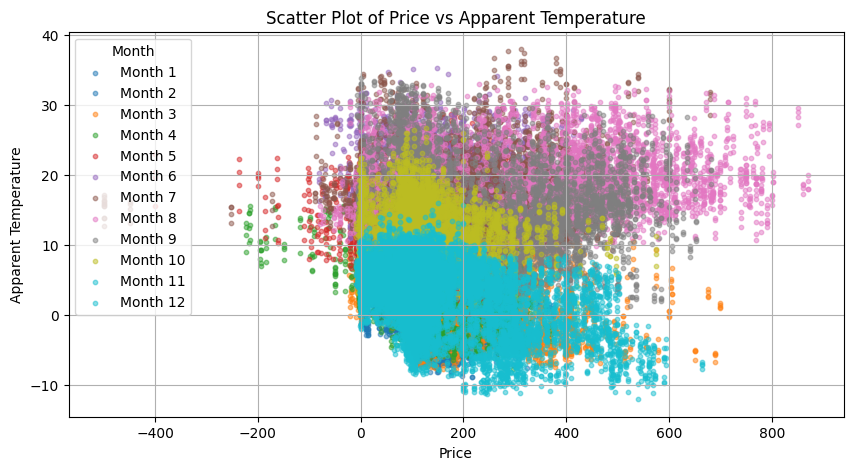

In [103]:
# Add a 'Month' column to the DataFrame
df_filtered['Month'] = df_filtered.index.month

# Define a color map for the months
colors = plt.cm.get_cmap('tab10', 12)  # Use a colormap with 12 distinct colors

# Plot the scatter plot with different colors for each month
plt.figure(figsize=(10, 5))
for month in range(1, 13):
    month_data = df_filtered[df_filtered['Month'] == month]
    plt.scatter(month_data['Price'], month_data['apparent_temperature'], s=10, alpha=0.5, color=colors(month-1), label=f'Month {month}')

plt.xlabel('Price')
plt.ylabel('Apparent Temperature')
plt.title('Scatter Plot of Price vs Apparent Temperature')
plt.legend(title='Month')
plt.grid(True)
plt.show()

C:\Users\shba\AppData\Local\Temp\ipykernel_7680\3625309042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered.index.month
C:\Users\shba\AppData\Local\Temp\ipykernel_7680\3625309042.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', 12)  # Use a colormap with 12 distinct colors


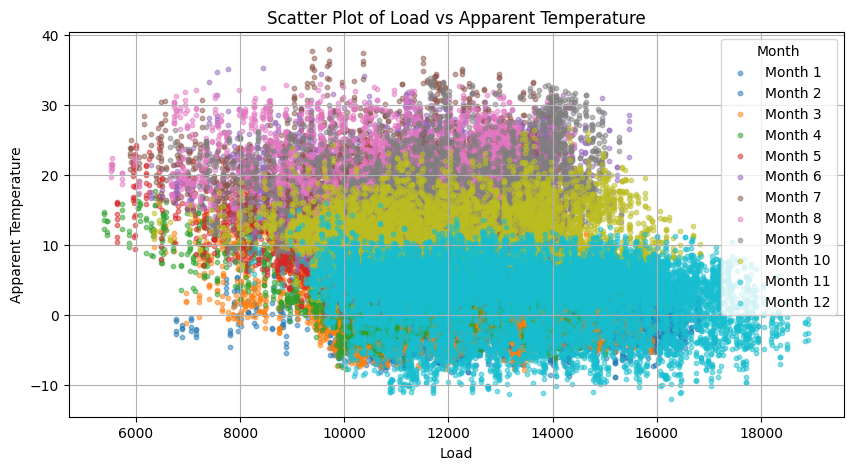

In [ ]:
# Add a 'Month' column to the DataFrame
df_filtered['Month'] = df_filtered.index.month

# Define a color map for the months
colors = plt.cm.get_cmap('tab10', 12)  # Use a colormap with 12 distinct colors

# Plot the scatter plot with different colors for each month
plt.figure(figsize=(10, 5))
for month in range(1, 13):
    month_data = df_filtered[df_filtered['Month'] == month]
    plt.scatter(month_data['Load'], month_data['apparent_temperature'], s=10, alpha=0.5, color=colors(month-1), label=f'Month {month}')

plt.xlabel('Load')
plt.ylabel('Apparent Temperature')
plt.title('Scatter Plot of Load vs Apparent Temperature')
plt.legend(title='Month')
plt.grid(True)
plt.show()

C:\Users\shba\AppData\Local\Temp\ipykernel_7680\2094658588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = df_filtered.index.hour
C:\Users\shba\AppData\Local\Temp\ipykernel_7680\2094658588.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Blues', 24)  # Use a colormap with 12 distinct colors


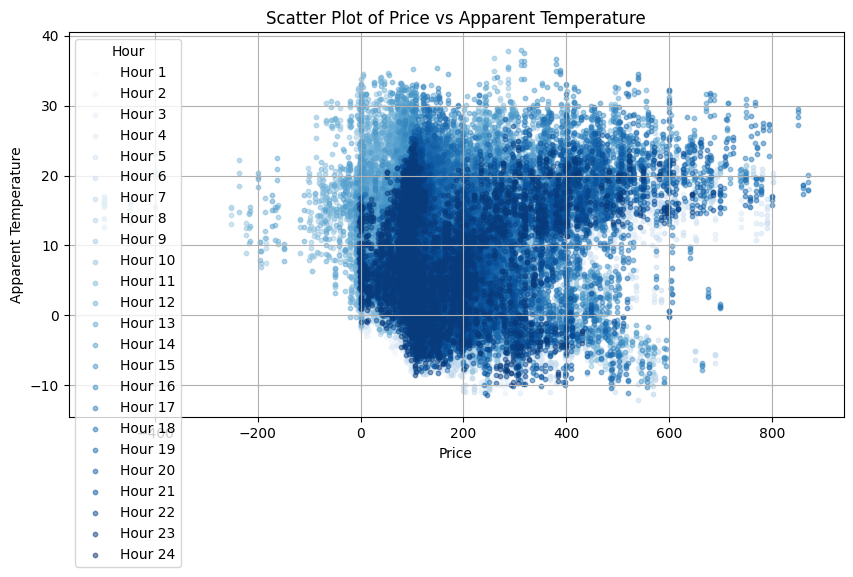

In [113]:
# Add a 'Hour' column to the DataFrame
df_filtered['Hour'] = df_filtered.index.hour

# Define a color map for the months
colors = plt.cm.get_cmap('Blues', 24)  # Use a colormap with 12 distinct colors

# Plot the scatter plot with different colors for each month
plt.figure(figsize=(10, 5))
for hour in range(1, 25):
    hour_data = df_filtered[df_filtered['Hour'] == hour]
    plt.scatter(hour_data['Price'], hour_data['apparent_temperature'], s=10, alpha=0.5, color=colors(hour-1), label=f'Hour {hour}')

plt.xlabel('Price')
plt.ylabel('Apparent Temperature')
plt.title('Scatter Plot of Price vs Apparent Temperature')
plt.legend(title='Hour')
plt.grid(True)
plt.show()

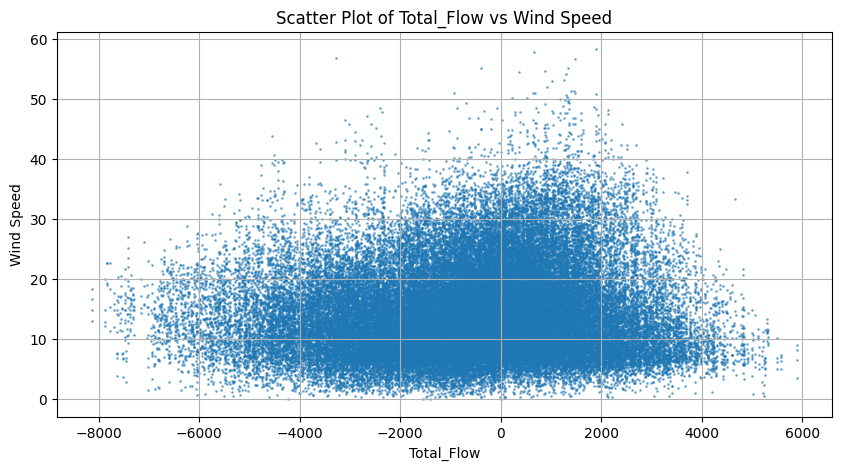

In [115]:
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Total_Flow'], df_filtered['wind_speed_10m'], s=1, alpha=0.5)  # Adjust 's' for point size
plt.xlabel('Total_Flow')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Total_Flow vs Wind Speed')
plt.grid(True)
plt.show()

In [91]:
import numpy as np

# Drop rows with missing values in 'Price' or 'Load' columns
df_filtered_ws = df_filtered[['Total_Flow', 'wind_speed_10m']].dropna()

# Calculate the correlation coefficient
r = np.corrcoef(df_filtered_ws['Total_Flow'], df_filtered_ws['wind_speed_10m'])
print("Correlation coefficient matrix:")
print(r)

Correlation coefficient matrix:
[[1.         0.08194576]
 [0.08194576 1.        ]]


In [92]:
nan_totalflow = df_filtered['Total_Flow'].isna().sum()
print(nan_totalflow)
nan_temp = df_filtered['temperature_2m'].isna().sum()
print(nan_temp)
nan_cloud = df_filtered['cloud_cover'].isna().sum()
print(nan_cloud)

8
0
0


Missing values in Total_Flow: 0
Missing values in temperature_2m: 0
Missing values in cloud_cover: 0
Missing values in wind_speed_10m: 0
Missing values in direct_normal_irradiance: 0
Mean Squared Error: 13176.016968055099
R^2 Score: 0.13266265213191542


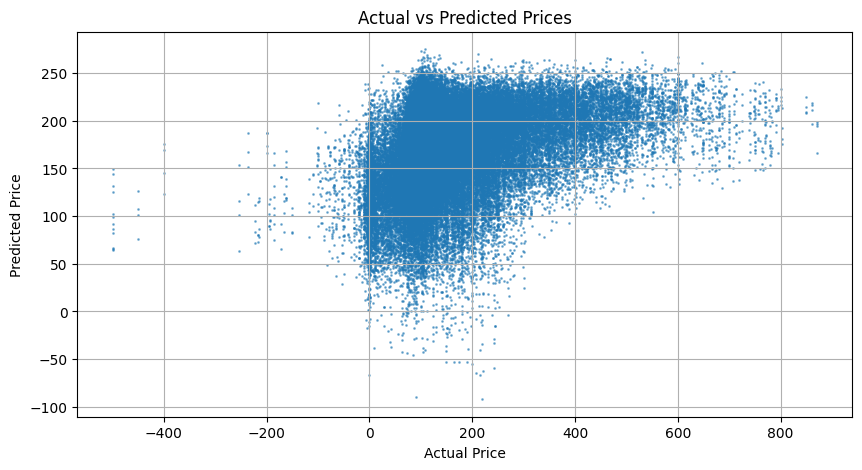

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Check for missing values in the relevant columns
nan_totalflow = df_filtered['Total_Flow'].isna().sum()
nan_temp = df_filtered['temperature_2m'].isna().sum()
nan_cloud = df_filtered['cloud_cover'].isna().sum()
nan_wind = df_filtered['wind_speed_10m'].isna().sum()
nan_direct_normal_irradiance = df_filtered['direct_normal_irradiance'].isna().sum()

print(f"Missing values in Total_Flow: {nan_totalflow}")
print(f"Missing values in temperature_2m: {nan_temp}")
print(f"Missing values in cloud_cover: {nan_cloud}")
print(f"Missing values in wind_speed_10m: {nan_wind}")
print(f"Missing values in direct_normal_irradiance: {nan_direct_normal_irradiance}")

# Drop rows with missing values in the relevant columns
df_filtered = df_filtered[['Price', 'Total_Flow', 'temperature_2m', 'cloud_cover', 'wind_speed_10m', 'direct_normal_irradiance']].dropna()

# Define the features (X) and the target (y)
X = df_filtered[['Total_Flow', 'temperature_2m', 'cloud_cover', 'wind_speed_10m', 'direct_normal_irradiance']]
y = df_filtered['Price']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred, s=1, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

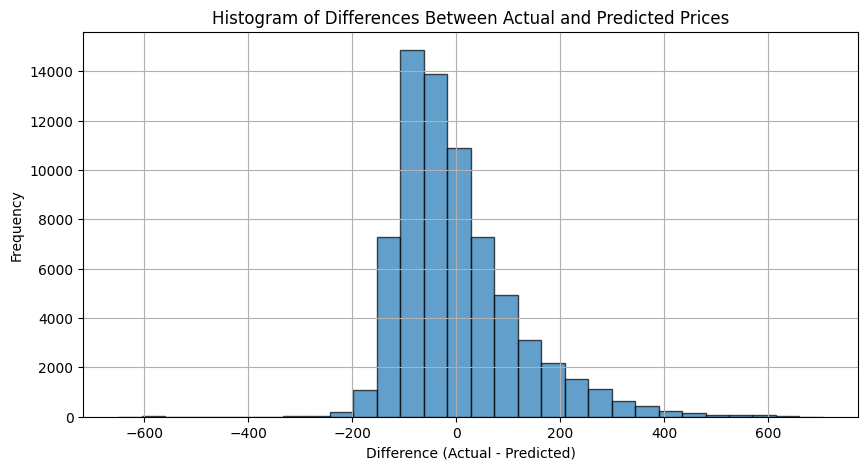

In [95]:
# Calculate the differences between actual and predicted prices
differences = y - y_pred

# Plot the histogram of differences
plt.figure(figsize=(10, 5))
plt.hist(differences, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Difference (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Differences Between Actual and Predicted Prices')
plt.grid(True)
plt.show()